In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
taxi = pd.read_csv(r'Data_frame\taxi.csv', index_col=[0],parse_dates=[0])

In [3]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
taxi

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [5]:
taxi.sort_index(inplace=True)

In [6]:
# Verificar si el índice es monotónico
print("¿El índice es monotónico creciente?", taxi.index.is_monotonic_increasing)
print("¿El índice es monotónico decreciente?", taxi.index.is_monotonic_decreasing)

¿El índice es monotónico creciente? True
¿El índice es monotónico decreciente? False


In [7]:
taxi.resample("1H").sum()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [8]:
taxi["moving_avg"] = taxi.rolling(24).mean()

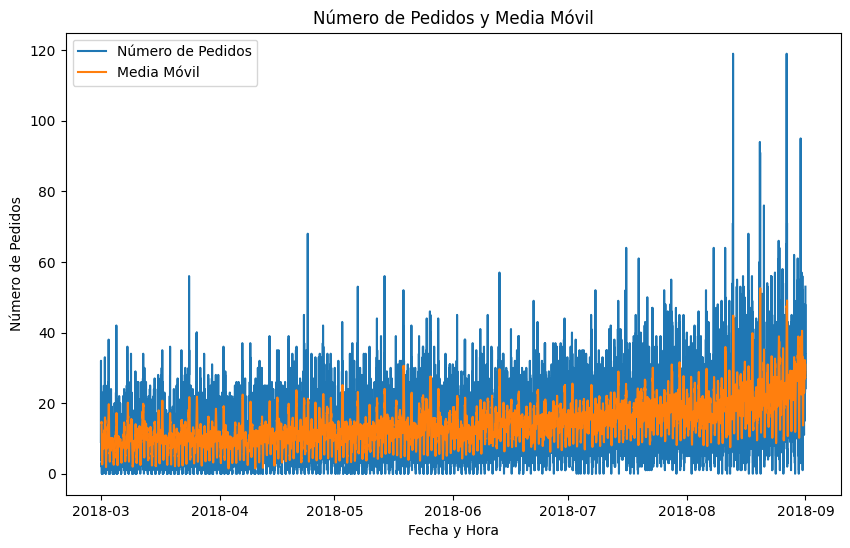

In [9]:
# Visualizar los datos originales y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(taxi.index, taxi['num_orders'], label='Número de Pedidos')
plt.plot(taxi.index, taxi['moving_avg'], label='Media Móvil')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Pedidos')
plt.title('Número de Pedidos y Media Móvil')
plt.legend()
plt.show()

In [14]:
taxi

,num_orders,moving_avg
datetime,,
2018-03-01 00:00:00,9,NaN
2018-03-01 00:10:00,14,NaN
2018-03-01 00:20:00,28,NaN
2018-03-01 00:30:00,20,NaN
2018-03-01 00:40:00,32,NaN
...,...,...
2018-08-31 23:10:00,32,28.416667
2018-08-31 23:20:00,24,28.500000
2018-08-31 23:30:00,27,28.625000


In [1]:
decomposed = seasonal_decompose(taxi)

plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

NameError: name 'seasonal_decompose' is not defined